# Task 2 : Quantitative Analysis using pynance and Talib

In [1]:
# reload the module
%load_ext autoreload
%autoreload 2 

In [2]:
import sys
from pathlib import Path

# Add the project root directory to sys.path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [3]:
# importing libraries
import talib
import pandas as pd
import yfinance as yf
import plotly as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

In [4]:
# import modules
from src.y_finance_data_loader import DataLoader

### Loading and Preparing Data

In [5]:
# Load the dataset
directory = '../data/yfinance_data'
# List all files in the directory
file_names = os.listdir(directory)
for file_name in file_names:
    if os.path.isfile(os.path.join(directory, file_name)):
        print(os.path.join(directory, file_name))
        data_loader = DataLoader(os.path.join(directory, file_name))
        ticker_symbol = file_name.split('_')[0]
        df = data_loader.load_data()
        # Keep each dataframe in a variable with their ticker symbol
        locals()[ticker_symbol] = df


../data/yfinance_data\AAPL_historical_data.csv
../data/yfinance_data\AMZN_historical_data.csv
../data/yfinance_data\GOOG_historical_data.csv
../data/yfinance_data\META_historical_data.csv
../data/yfinance_data\MSFT_historical_data.csv
../data/yfinance_data\NVDA_historical_data.csv
../data/yfinance_data\TSLA_historical_data.csv


In [6]:
# Filter Columns & Standardize DataFrames
stock_data = {
    'AAPL': AAPL,
    'AMZN': AMZN,
    'MSFT': MSFT,
    'GOOG': GOOG,
    'META': META,
    'TSLA': TSLA
}
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
for ticker, df in stock_data.items():
    stock_data[ticker] = df[required_columns]


In [7]:

# Loop through and display head() and info()
for ticker, df in stock_data.items():
    print(f"\n{ticker} Data (First 5 Rows):")
    print(df.head())
    print(f"\n{ticker} Info:")
    df.info()
    print("-" * 50)  # Separator for readability


AAPL Data (First 5 Rows):
        Date      Open      High       Low     Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600

AAPL Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10998 non-null  datetime64[ns]
 1   Open    10998 non-null  float64       
 2   High    10998 non-null  float64       
 3   Low     10998 non-null  float64       
 4   Close   10998 non-null  float64       
 5   Volume  10998 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 515.7 KB
----------------------------------------------

### Apply Analysis Indicators with Talib

In [8]:
# import the module for Analysis
from src.quantitative_analysis.q_analysis import QuantitativeAnalysis

In [9]:
#  Quantitative Analysis class for each stock

# Initialize a dictionary to store all analyzed DataFrames
analyzed_stocks = {}

for ticker, df in stock_data.items():
    # Create analysis object for this stock
    analysis = QuantitativeAnalysis(df)
    
    # Calculate all indicators
    df['SMA20'] = analysis.calculate_SMA('Close', 20)
    df['EMA'] = analysis.calculate_EMA('Close', 20)
    df['RSI'] = analysis.calculate_RSI('Close', 14)
    df[['MACD', 'MACD_signal', 'MACD_hist']] = analysis.calculate_MACD('Close')
    df['Volatility'] = analysis.calculate_volatility('Close', 21)
    df['Daily Returns'] = analysis.calculate_daily_returns('Close')
    
    # Store the analyzed DataFrame
    analyzed_stocks[ticker] = df

# store each analyzed stock in a variable:
AAPL = analyzed_stocks['AAPL']
AMZN = analyzed_stocks['AMZN']
MSFT = analyzed_stocks['MSFT']
GOOG = analyzed_stocks['GOOG']
META = analyzed_stocks['META']
TSLA = analyzed_stocks['TSLA']

C:\Users\chall\AppData\Local\Temp\ipykernel_11844\3623273039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA20'] = analysis.calculate_SMA('Close', 20)
C:\Users\chall\AppData\Local\Temp\ipykernel_11844\3623273039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA'] = analysis.calculate_EMA('Close', 20)
C:\Users\chall\AppData\Local\Temp\ipykernel_11844\3623273039.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [10]:
# Display ech DataFrame's head() and info() with new indicators
for ticker, df in analyzed_stocks.items():
    print(f"\n{ticker} Analyzed Data (First 5 Rows):")
    print(df.head())
    print(f"\n{ticker} Analyzed Info:")
    df.info()
    print("-" * 50)  # Separator for readability


AAPL Analyzed Data (First 5 Rows):
        Date      Open      High       Low     Close     Volume  SMA20  EMA  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600    NaN  NaN   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800    NaN  NaN   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000    NaN  NaN   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600    NaN  NaN   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600    NaN  NaN   

   RSI  MACD  MACD_signal  MACD_hist  Volatility  Daily Returns  
0  NaN   NaN          NaN        NaN         NaN            NaN  
1  NaN   NaN          NaN        NaN         NaN      -0.052171  
2  NaN   NaN          NaN        NaN         NaN      -0.073398  
3  NaN   NaN          NaN        NaN         NaN       0.024751  
4  NaN   NaN          NaN        NaN         NaN       0.028992  

AAPL Analyzed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10

In [11]:
# find minimum and maximum year in the AAPL dataset
min_year = min(AAPL['Date'].dt.year)
max_year = max(AAPL['Date'].dt.year)
print(f"Minimum Year: {min_year}, Maximum Year: {max_year}")

Minimum Year: 1980, Maximum Year: 2024


In [12]:
# filter each DataFrame to only include data from 2020 to 2023
start_date = '2020-01-01'
end_date = '2023-12-31'
AAPL = AAPL[(AAPL['Date'] >= start_date) & (AAPL['Date'] <= end_date)]
AMZN = AMZN[(AMZN['Date'] >= start_date) & (AMZN['Date'] <= end_date)]
MSFT = MSFT[(MSFT['Date'] >= start_date) & (MSFT['Date'] <= end_date)]
GOOG = GOOG[(GOOG['Date'] >= start_date) & (GOOG['Date'] <= end_date)]
META = META[(META['Date'] >= start_date) & (META['Date'] <= end_date)]
TSLA = TSLA[(TSLA['Date'] >= start_date) & (TSLA['Date'] <= end_date)]

### data visualization for each stock

In [13]:

# Import the visualization module
from src.visualization.visualization import Visualization


 AAPL Technical Analysis Charts


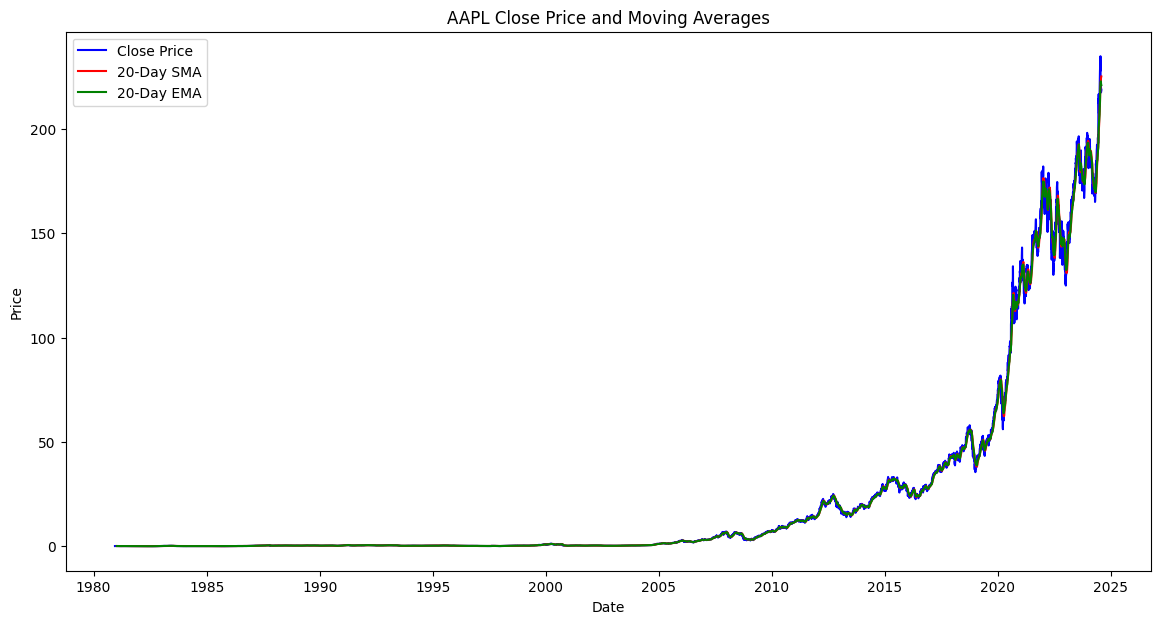

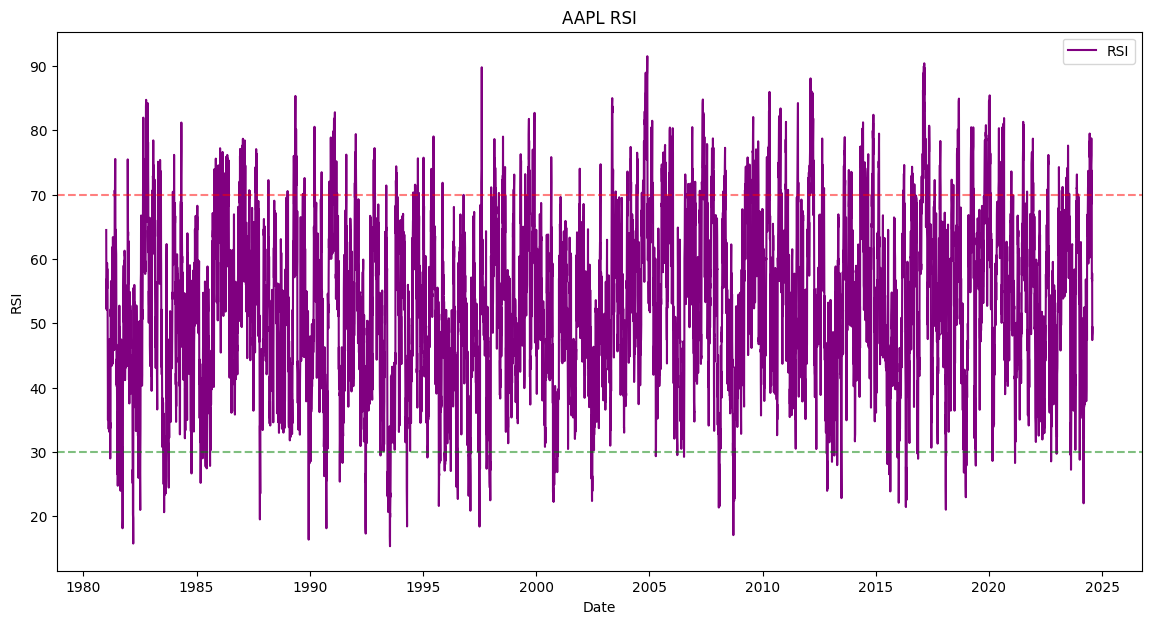

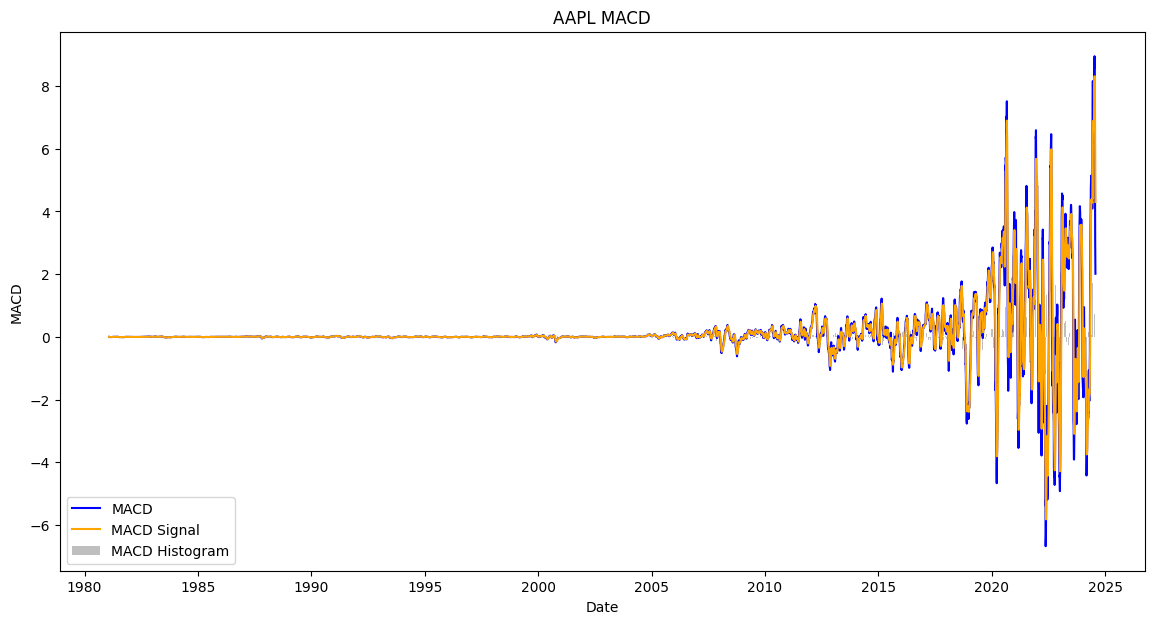

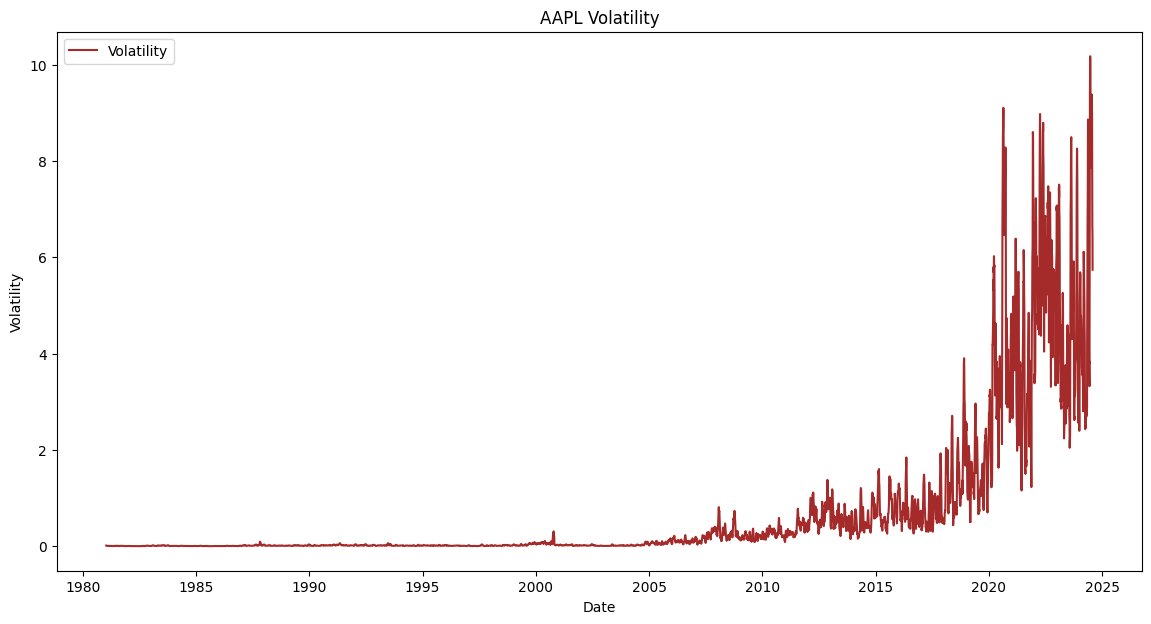


 AMZN Technical Analysis Charts


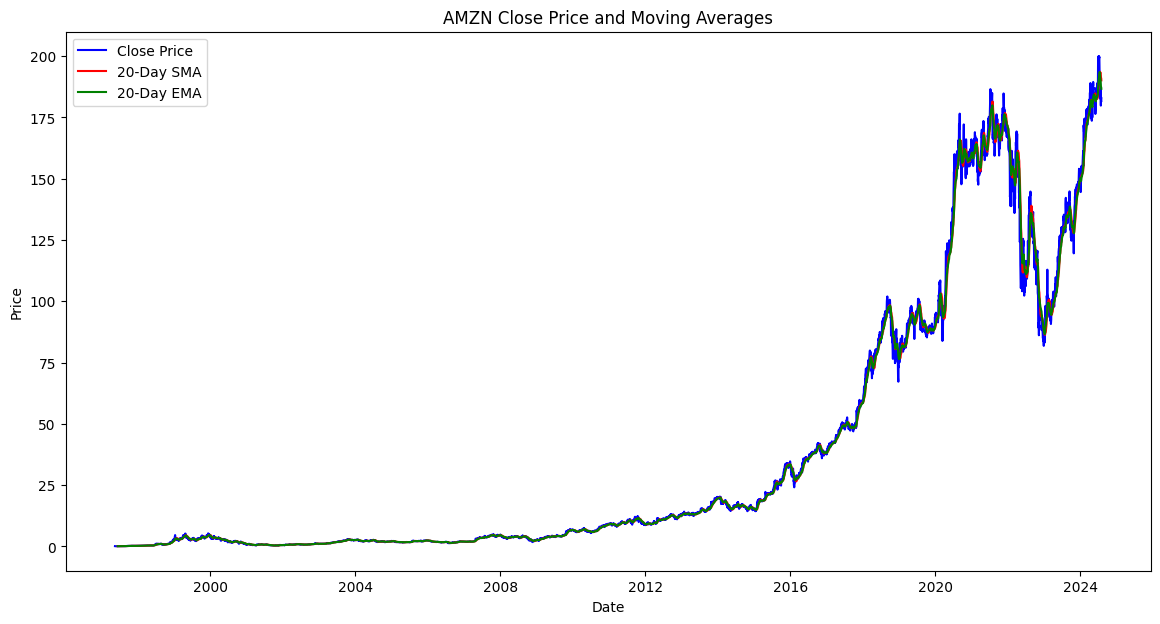

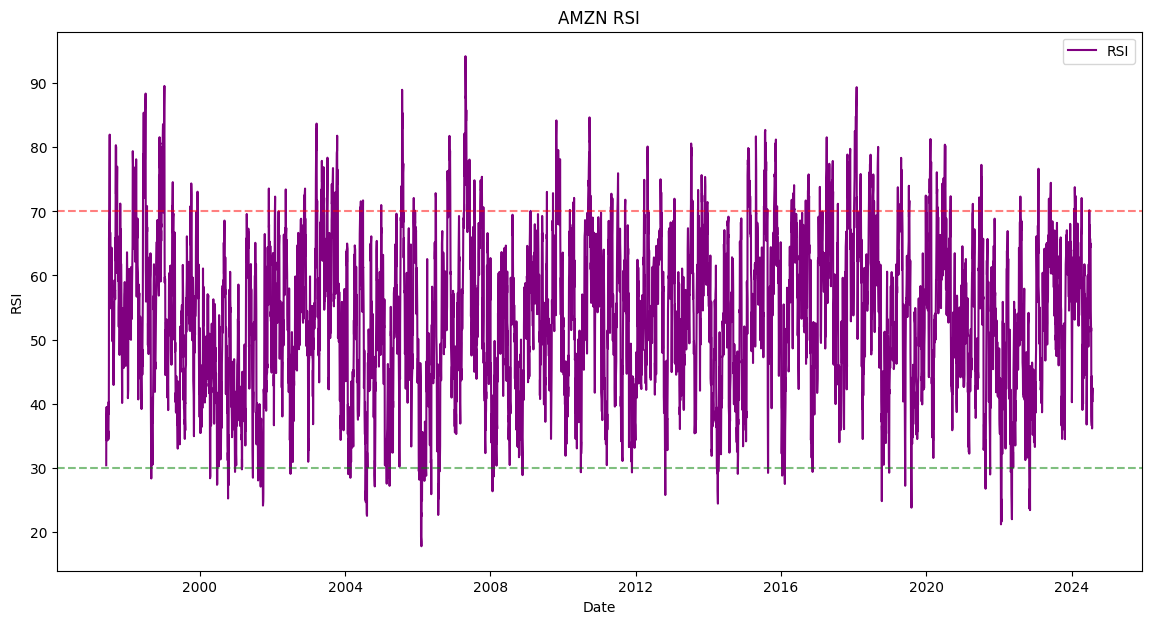

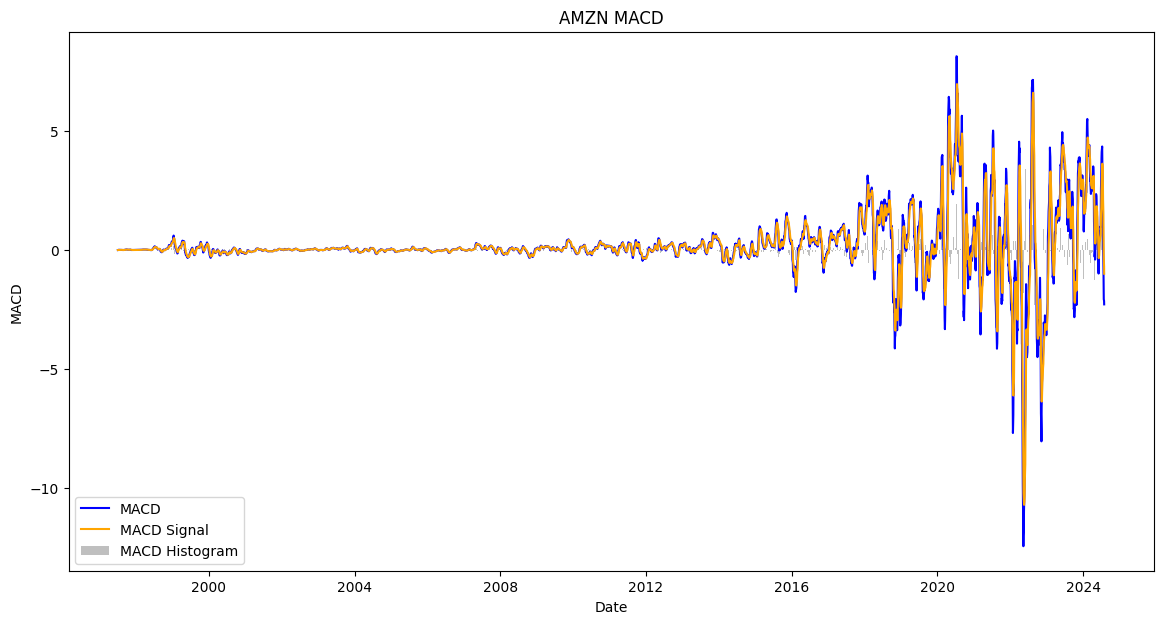

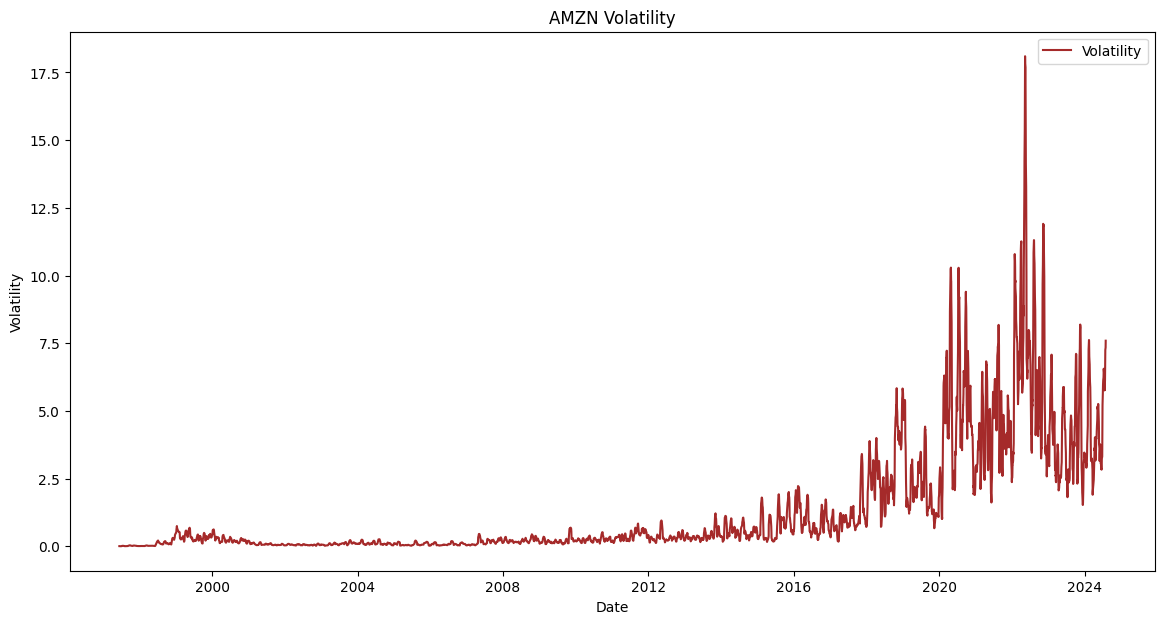


 MSFT Technical Analysis Charts


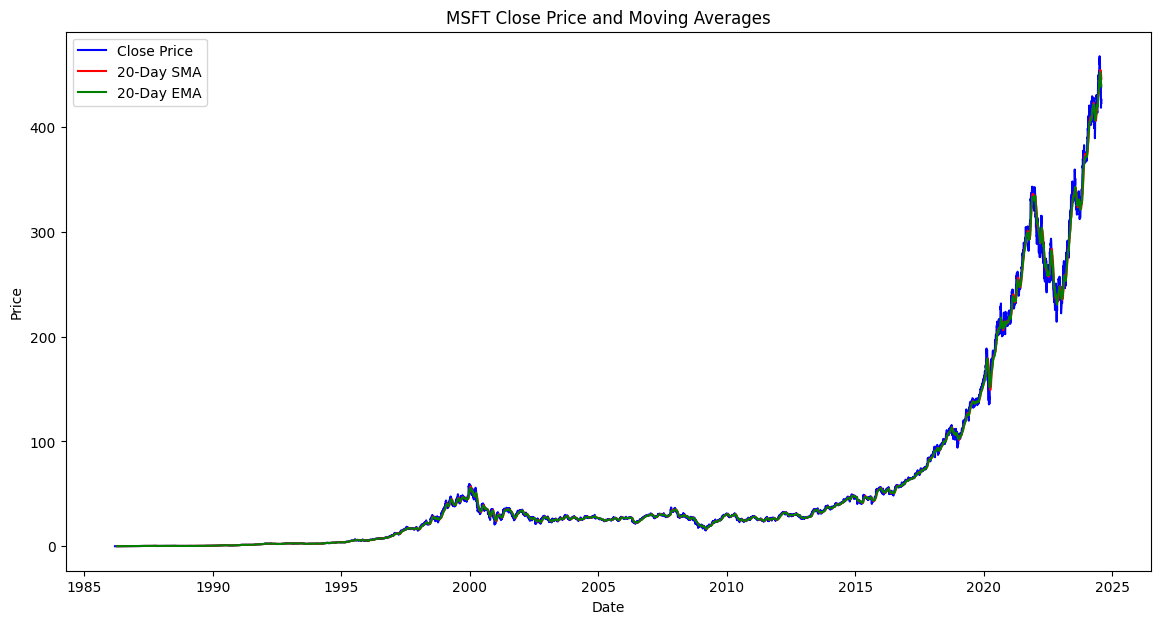

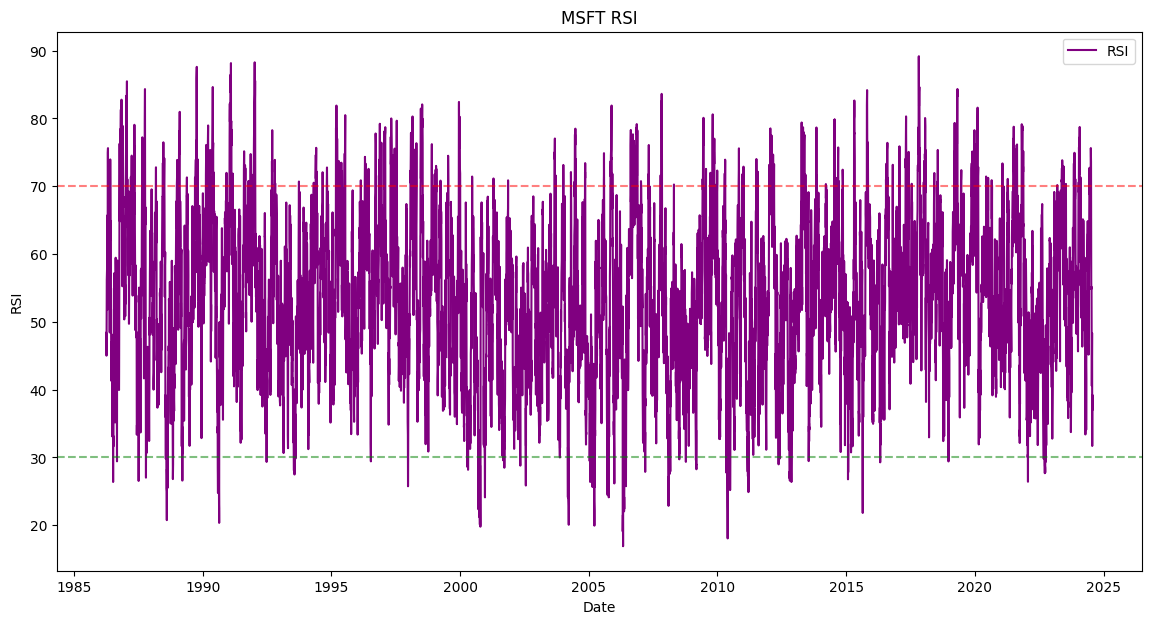

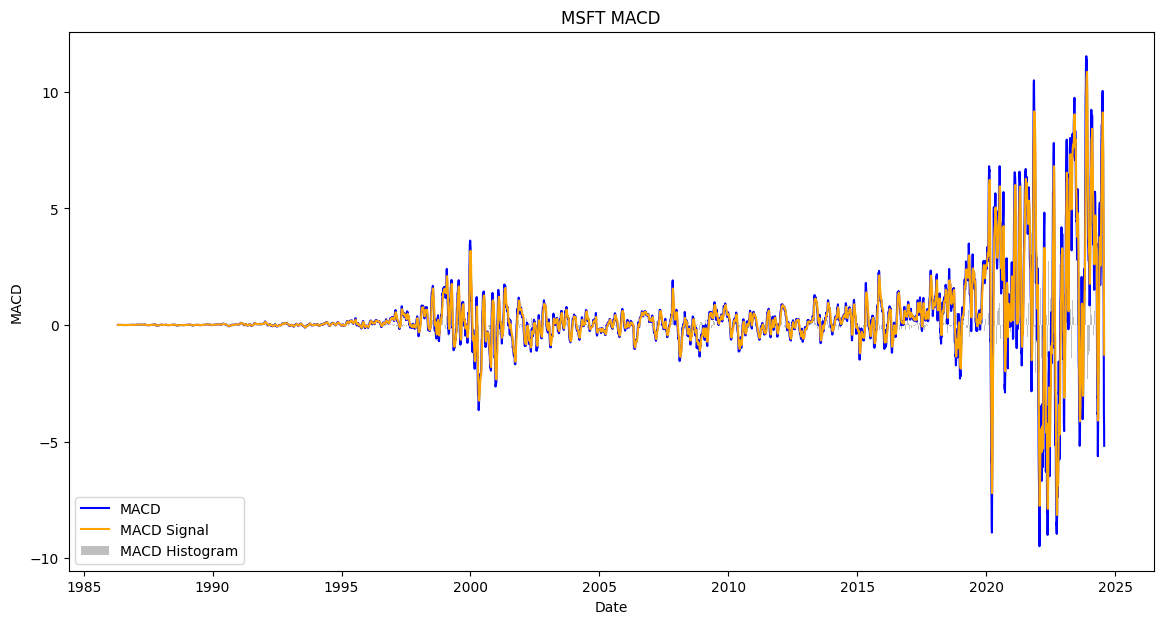

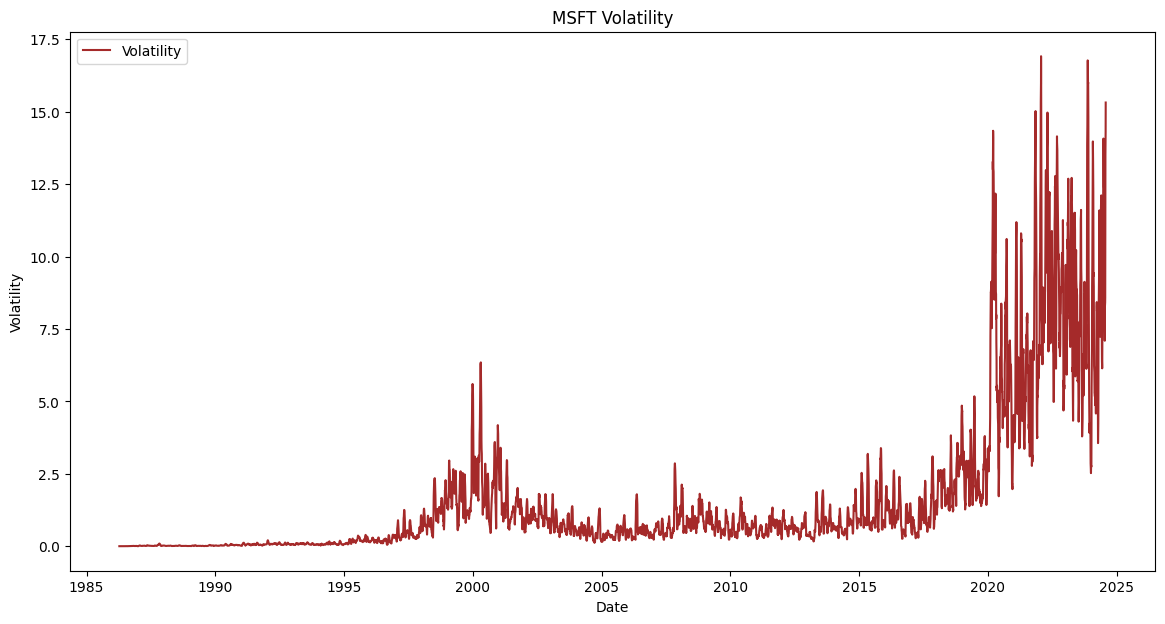


 GOOG Technical Analysis Charts


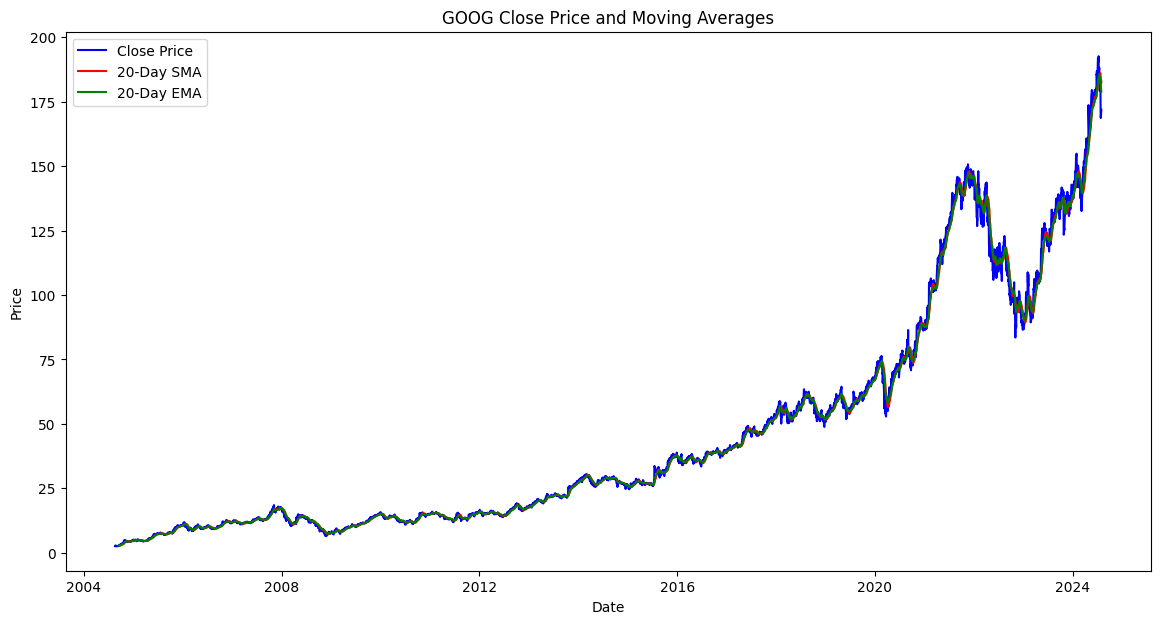

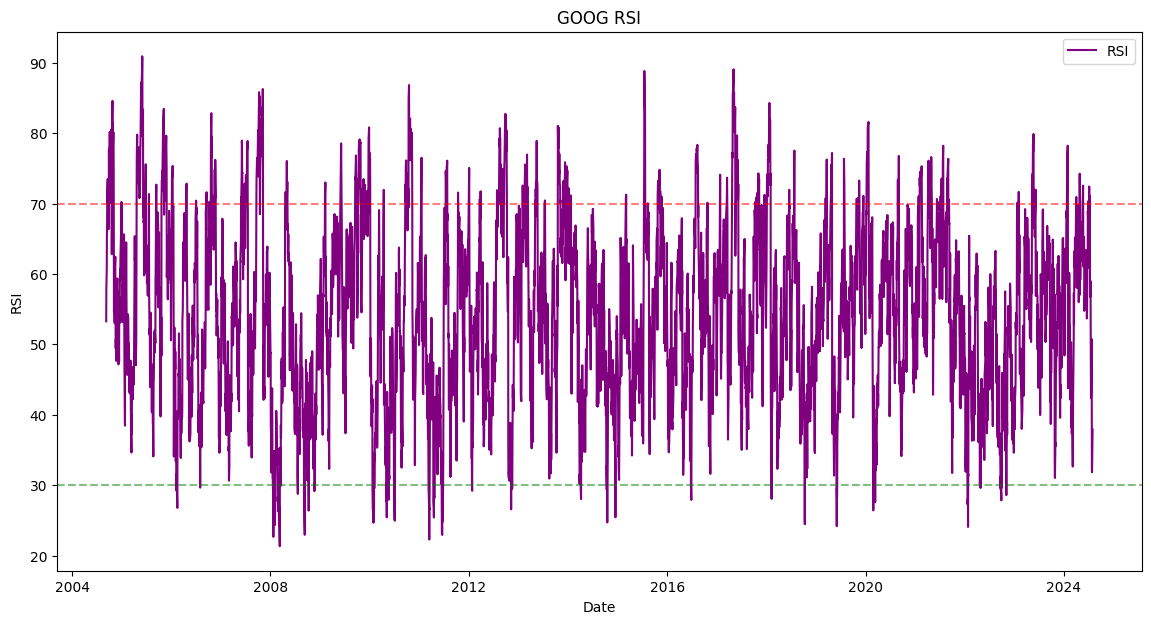

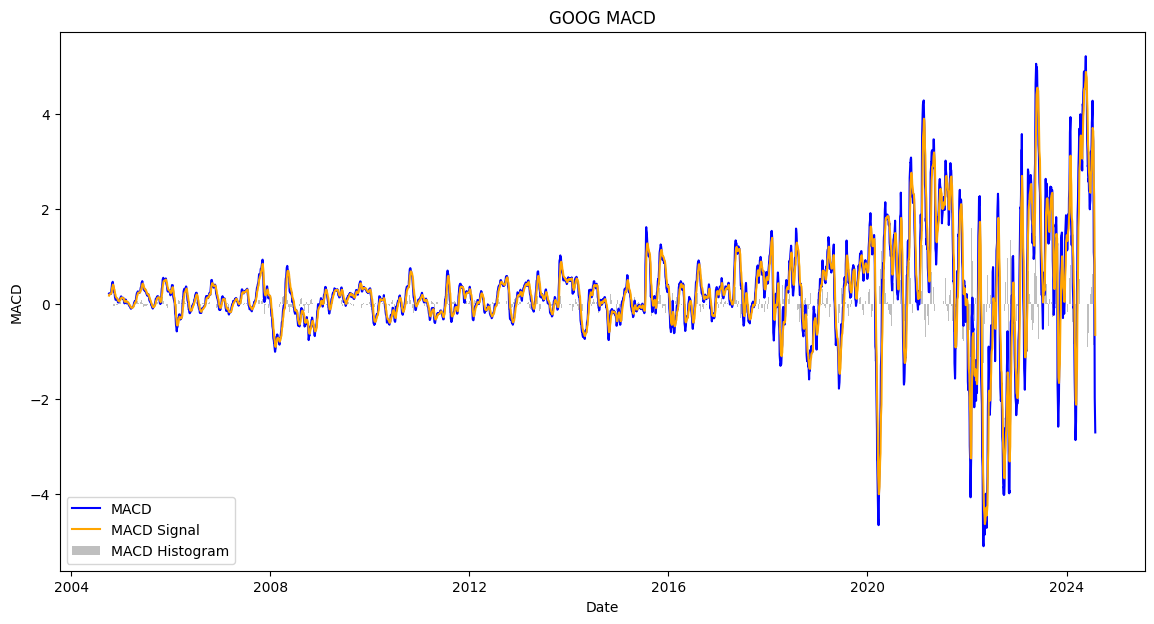

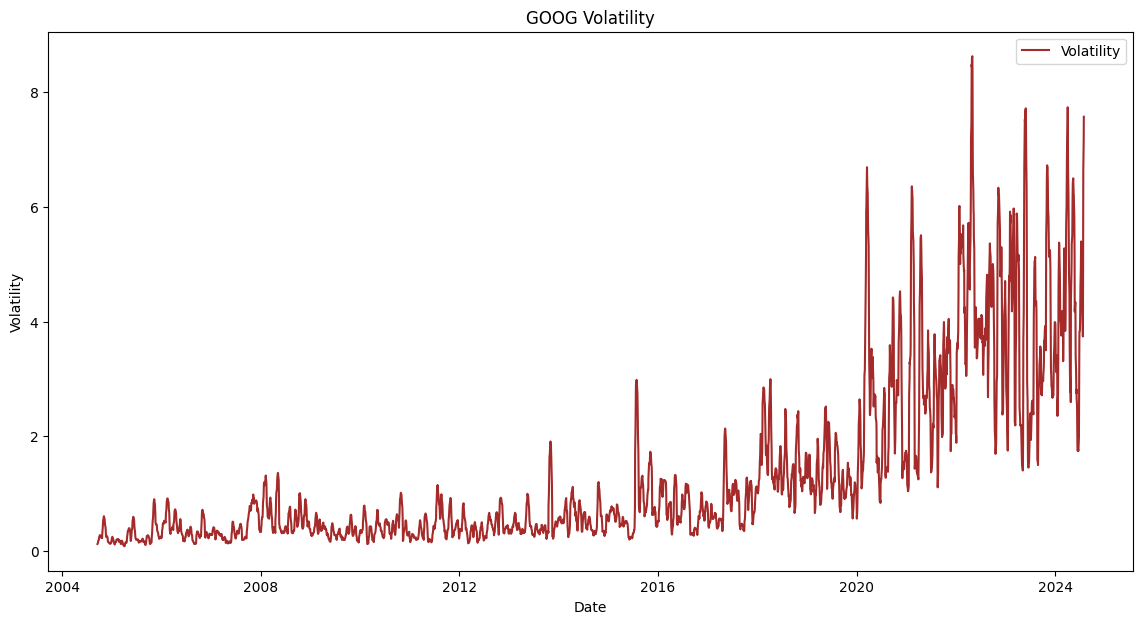


 META Technical Analysis Charts


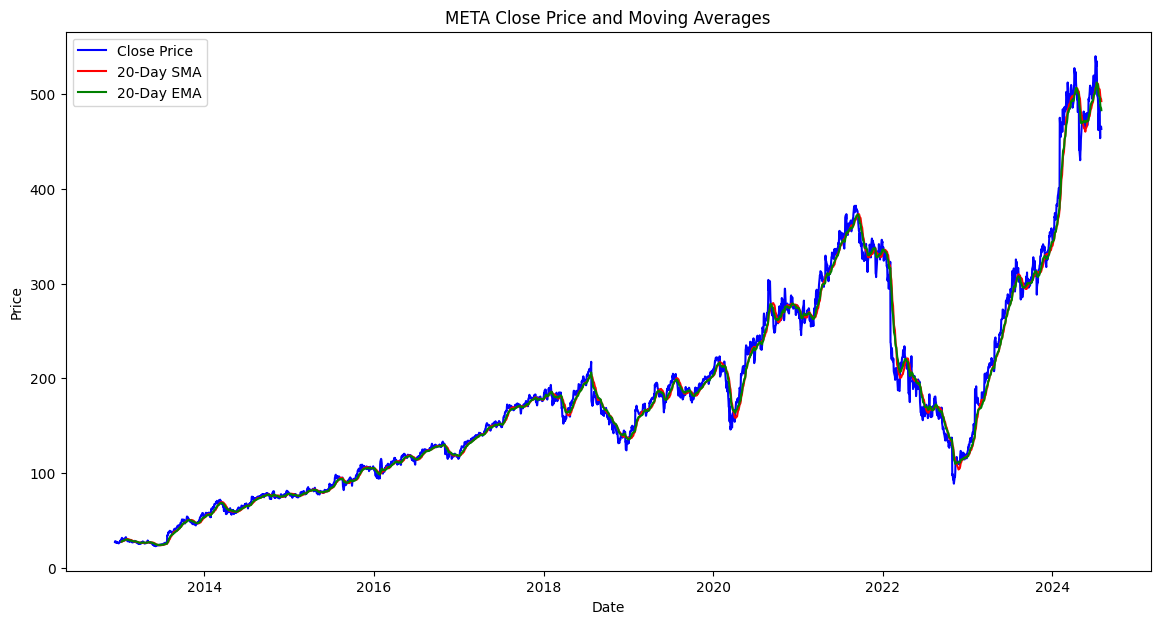

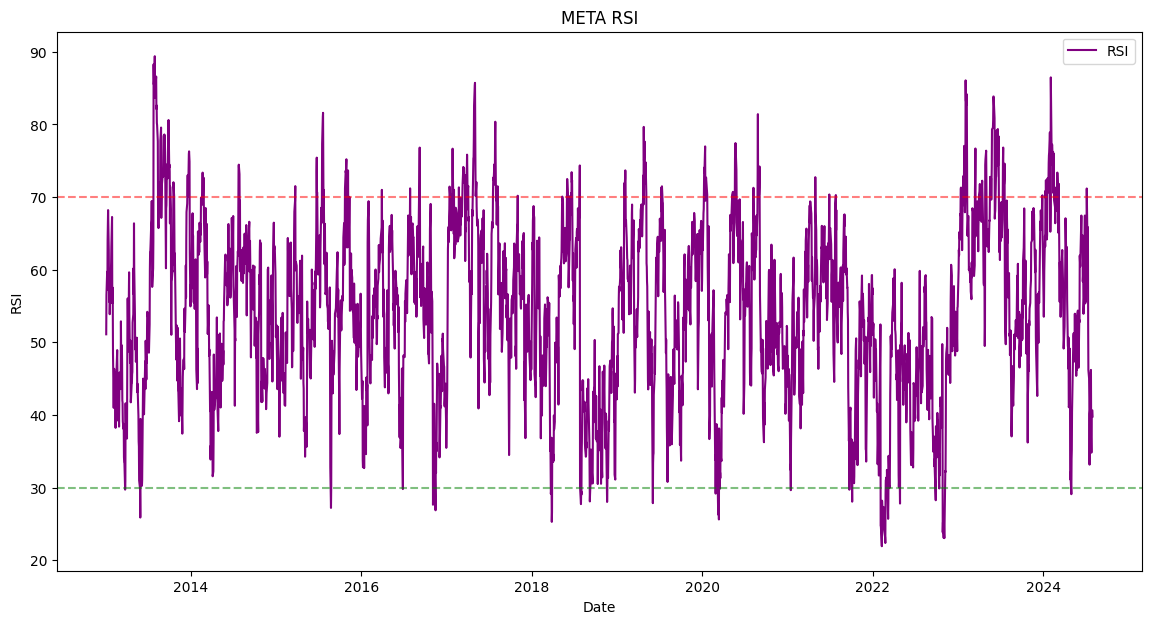

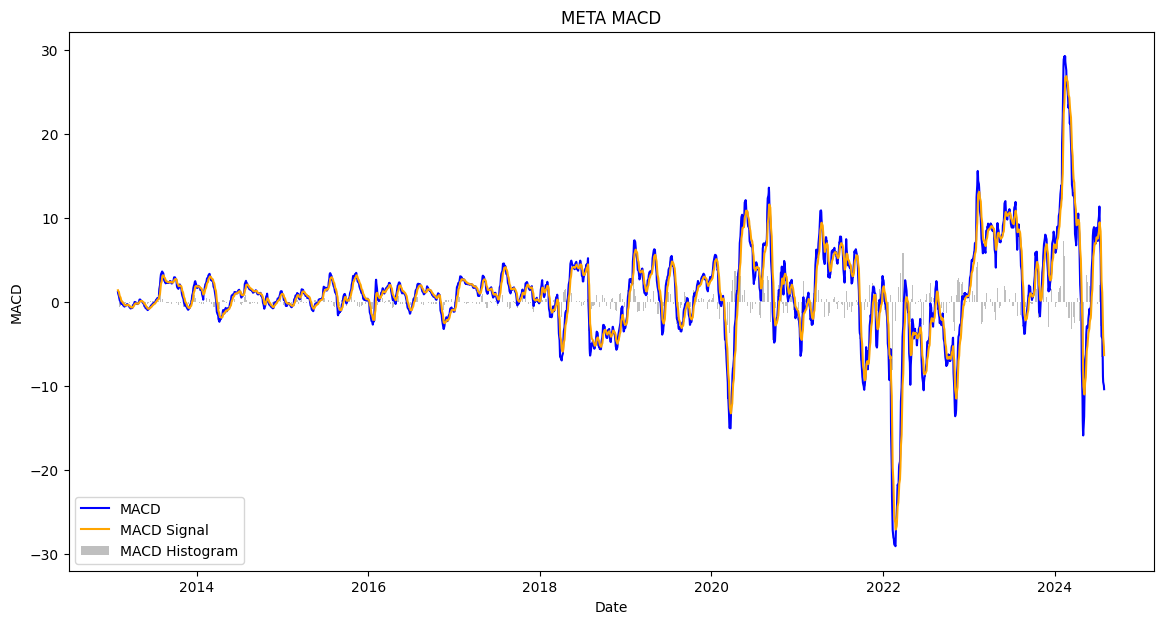

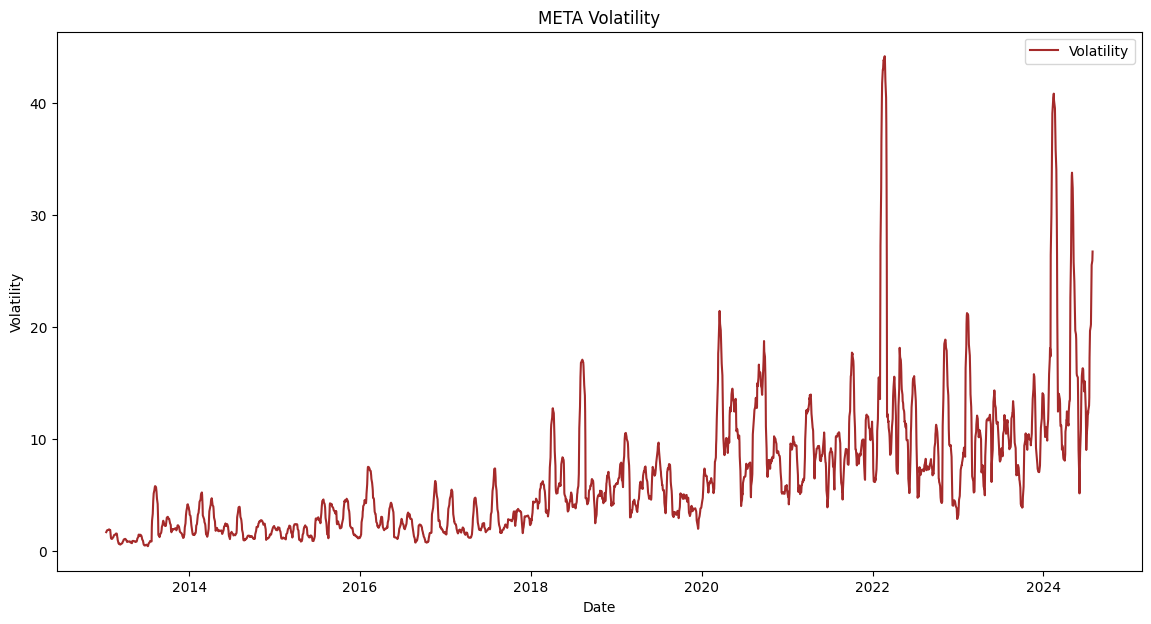


 TSLA Technical Analysis Charts


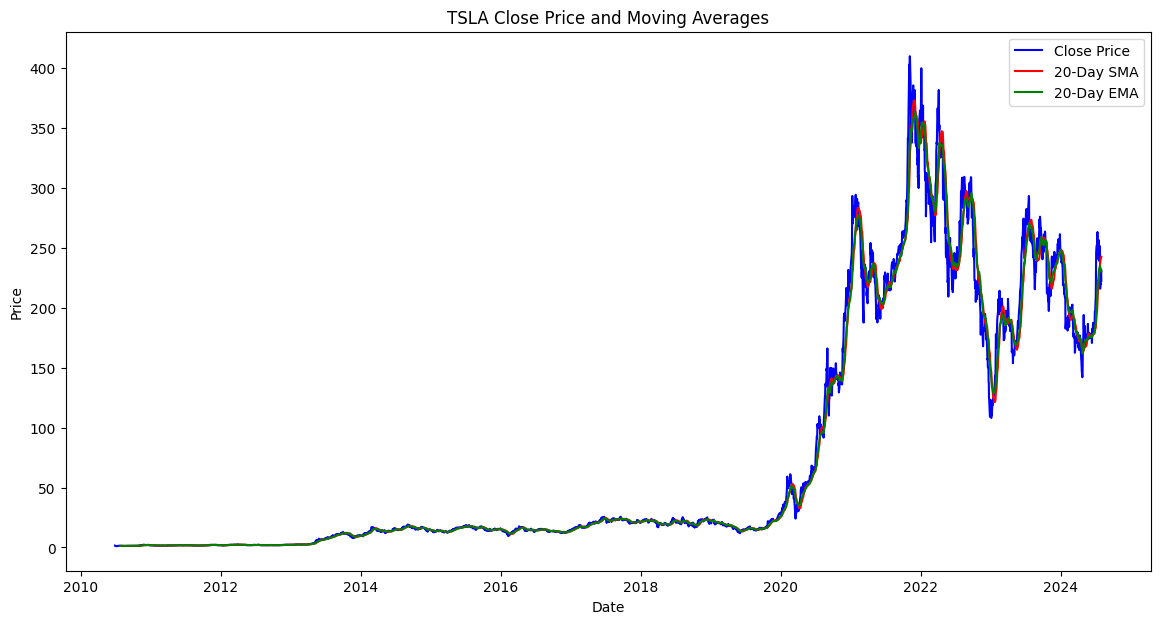

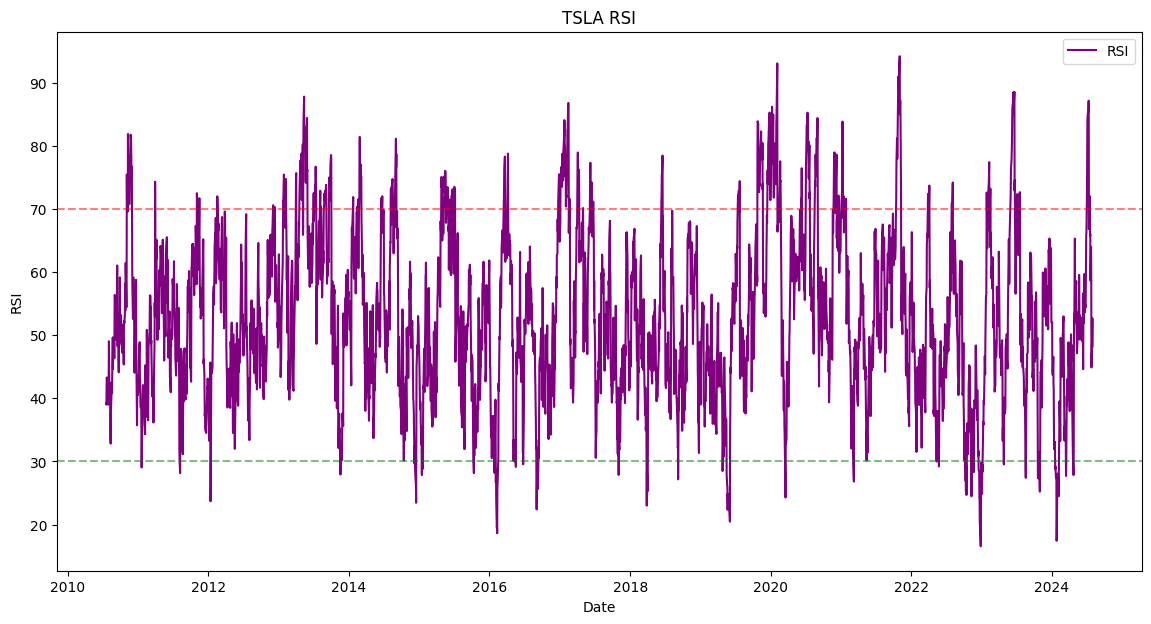

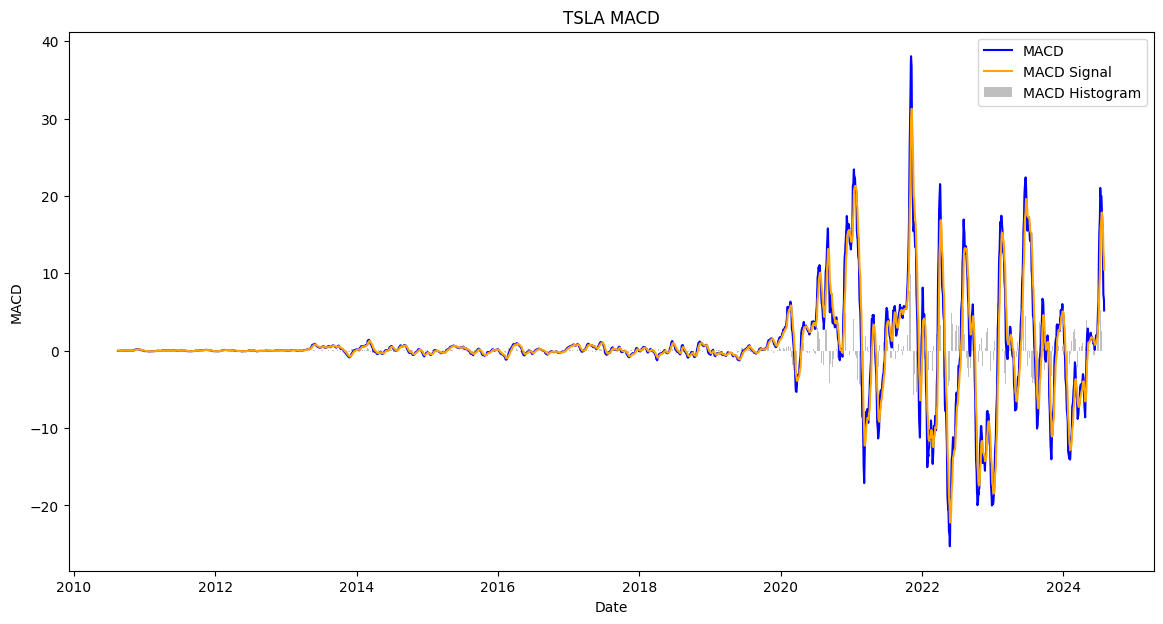

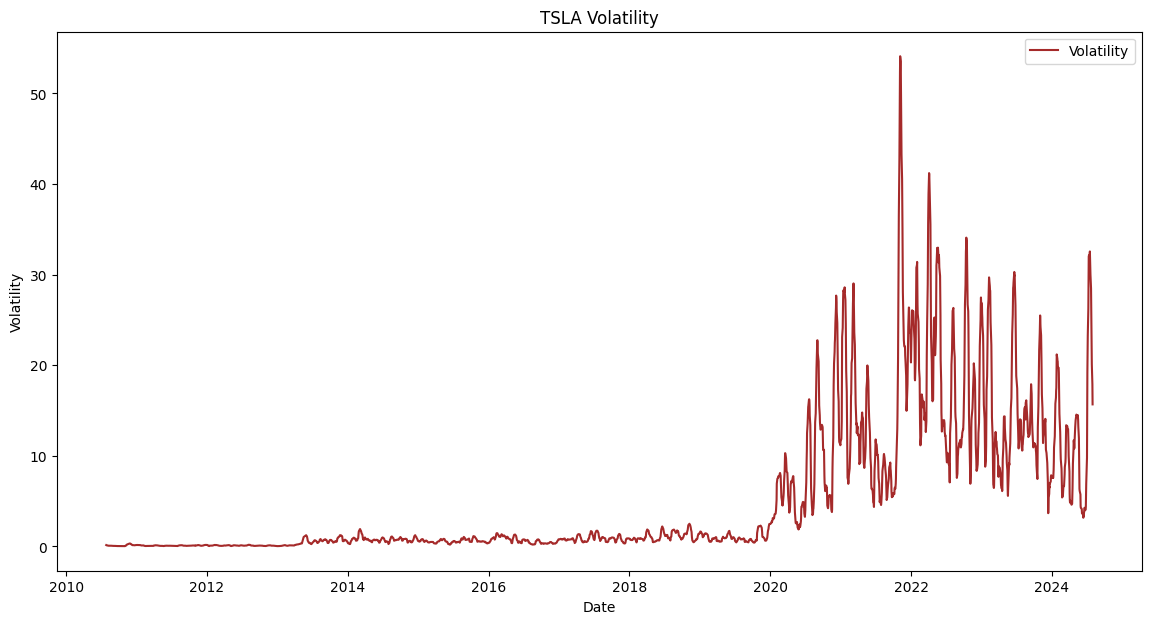

In [14]:
# Initialize Visualization for each stock and plot all charts
for ticker, df in analyzed_stocks.items():
    print(f"\n {ticker} Technical Analysis Charts")
    print("="*50)
    
    visualizer = Visualization(df)
    
   
    
    # 1. Price and Moving Averages
    visualizer.plot_price_moving_averages(ticker)
    
    # 2. RSI
    visualizer.plot_rsi(ticker)
    
    # 3. MACD
    visualizer.plot_macd(ticker)
    
    # 4. Volatility
    visualizer.plot_volatility(ticker)